Install commands:

```
pip install matplotlib pandas
```

In [3]:
import pandas

In [4]:
import matplotlib

In [5]:
%matplotlib inline

In [6]:
ls

jetstream.csv  README.md  Untitled.ipynb


In [7]:
usage = pandas.read_csv('jetstream.csv')

In [8]:
usage


,login,jobs,sus_charged
0,1,506,3175.10
1,2,1319,11504.46
2,3,186,1151.24
3,4,343,2106.60
4,5,17,63.41
5,6,452,1486.68
6,7,18,66.28
7,8,519,12574.86
8,9,114,675.85
9,10,60,322.92


In [9]:
from matplotlib import pyplot


(array([20.,  6.,  4.,  3.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([   2. ,  133.7,  265.4,  397.1,  528.8,  660.5,  792.2,  923.9,
        1055.6, 1187.3, 1319. ]),
 <a list of 10 Patch objects>)

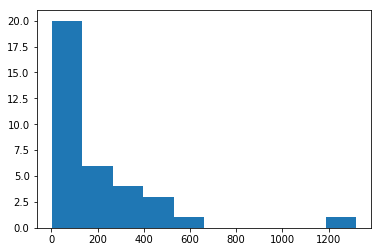

In [10]:
pyplot.hist(usage.jobs)

(array([26.,  6.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([2.9300000e+00, 1.2601230e+03, 2.5173160e+03, 3.7745090e+03,
        5.0317020e+03, 6.2888950e+03, 7.5460880e+03, 8.8032810e+03,
        1.0060474e+04, 1.1317667e+04, 1.2574860e+04]),
 <a list of 10 Patch objects>)

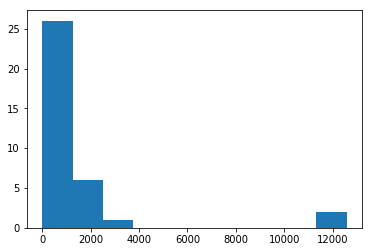

In [11]:
pyplot.hist(usage.sus_charged)